#**Insurance & Medical Cost Notebook**





### 1. Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### 2. Load the Dataset

In [4]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("insurance.csv")

Saving insurance.csv to insurance.csv


### 3. Data Cleaning


In [5]:
# Duplicates removal
df = df.drop_duplicates()

# Potential missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 4. Feature Engineering

In [6]:
# Creation of Age groups
age_bins = [17, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

# Parent or not
df['is_parent'] = df['children'] > 0

# Switching to 0 / 1 values
df['smoker_binary'] = df['smoker'].map({'no': 0, 'yes': 1})
df['sex_binary'] = df['sex'].map({'female': 0, 'male': 1})

### 5.1 Data Overview

In [7]:
print("\nData Overview:\n", df.describe())


Data Overview:
                age          bmi     children       charges  smoker_binary  \
count  1337.000000  1337.000000  1337.000000   1337.000000    1337.000000   
mean     39.222139    30.663452     1.095737  13279.121487       0.204936   
std      14.044333     6.100468     1.205571  12110.359656       0.403806   
min      18.000000    15.960000     0.000000   1121.873900       0.000000   
25%      27.000000    26.290000     0.000000   4746.344000       0.000000   
50%      39.000000    30.400000     1.000000   9386.161300       0.000000   
75%      51.000000    34.700000     2.000000  16657.717450       0.000000   
max      64.000000    53.130000     5.000000  63770.428010       1.000000   

        sex_binary  
count  1337.000000  
mean      0.504862  
std       0.500163  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


 ### 5.2 Variables and What They Mean

    age : The age of the insured person (in years).

    sex : The biological sex of the insured ( male And or female).

    bmi (Body Mass Index): a measure of body fat based on height and weight.

    children : Number of children/dependents covered by the insurance.

    smoker : the person smokes ( yes or no).

    region : The geographic region in the US where the person lives (northeast,northwest,southeast, southwest).

    charges : The medical insurance cost billed to the person (in dollars).

    age_group : A grouped version of age madeinto intervals ( 18-25, 26-35, ext..) for analysis.

    bmi_category : A label for BMI (underweight, normal, overweight, or obese)

    is_parent : A boolean, True if the person has children, False if The not.

    smoker_binary : A numeric version of smoker for analysis (1 for "yes", 0 for "no").

    sex_binary : A numeric version of sex (1 for "male", 0 for "female").

### 6. Visualization Section


 **Age distribution**


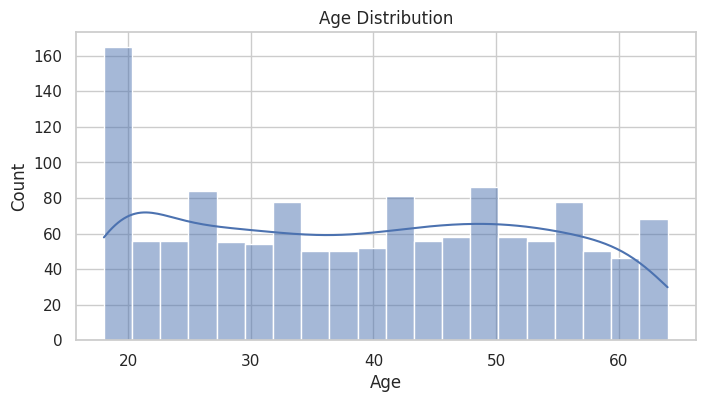

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

This histogram shows how many insured individuals fall into each age group.
We can see that the number of clients is highest at age 18–20, and then it gradually decreases The older age groups.
This means younger adults are overrepresented in the dataset, while older age groups have, numberin people.

 **Charges distribution**

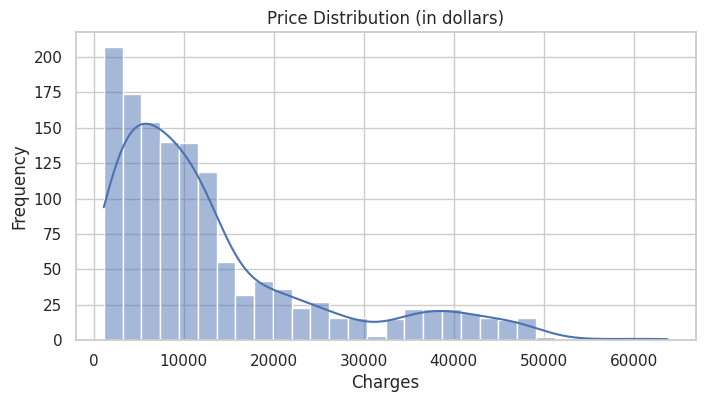

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Price Distribution (in dollars)")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

This graph shows how much people pay usually for insurance.
The Bridge People pay loess than $15000, and only a few pay a lot more.
That means high charges are rare, but to they exist for some people.

 **Charges by smoker**

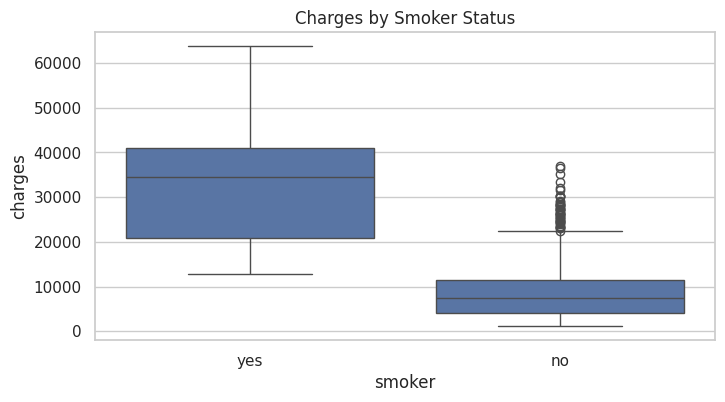

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker Status")
plt.show()

This graph compares insurance costs for smokers and non-smokers.
Smokers pay more much more for insurance than non-smokers.
This shows that some factors have a big impact on how much someone's charges is.

 **Charges by region**

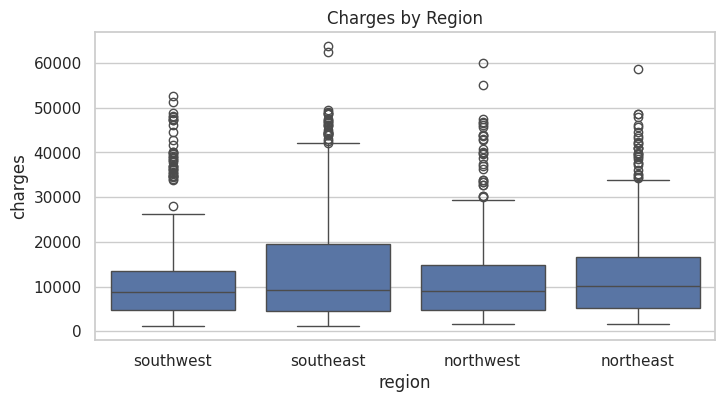

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.show()


 This graph compares insurance costs in different regions.
All four regions have The similar average charges, but the The southeast has a few more high-cost cases.
This means that location do not affect cost much, but the southeast may have slightly higher risks..

 **Charges by age group**

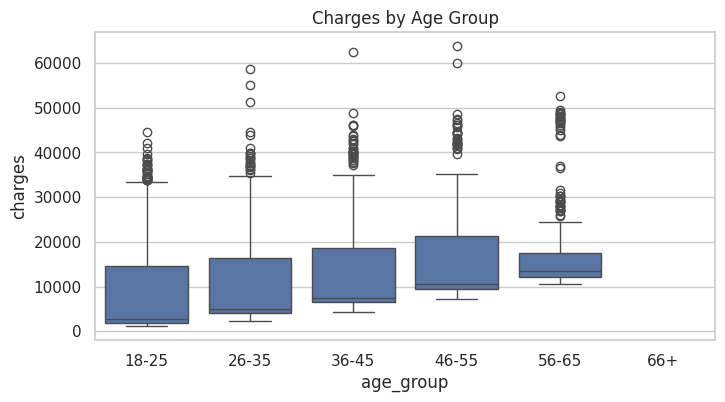

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x='age_group', y='charges', data=df)
plt.title("Charges by Age Group")
plt.show()

This graph shows how insurance charges change with age.
In general, older age groups tend to pay more, especially between those 46 and 65 years old.
This means that as people get older, their insurance costs usually go up.

 **BMI vs Charges**

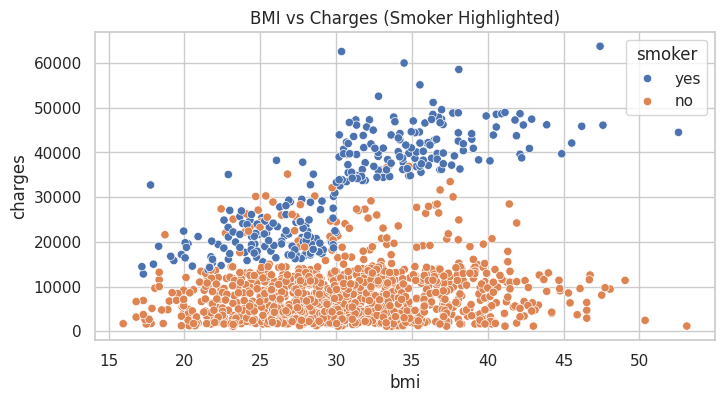

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges (Smoker Highlighted)")
plt.show()

This graph shows how body weight (BMI) insurance affects charges, with smokers and non-smokers in different colors.
We can see that The smokers (blue dots) a have much The higher charges, especially as BMI increases.
This means that overweight and being a smoker leads to very high insurance costs.

 **Distribution of Charges by Number of Children**

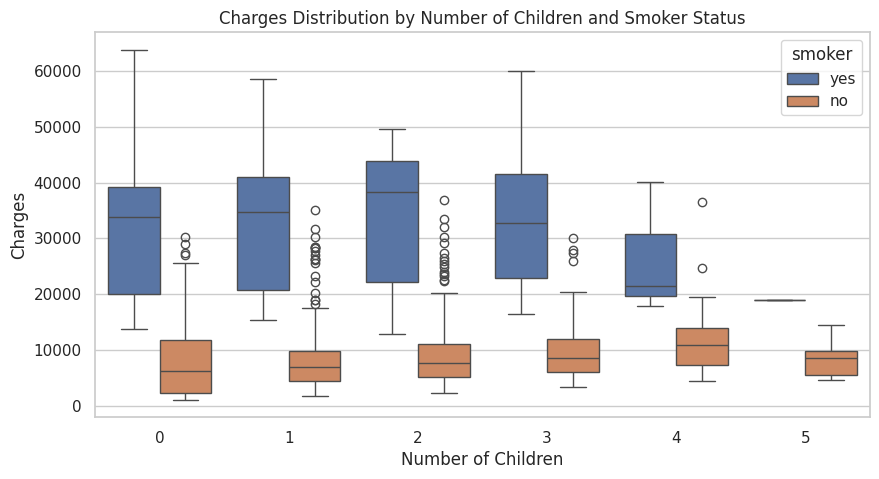

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='children', y='charges', hue='smoker')
plt.title("Charges Distribution by Number of Children and Smoker Status")
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.show()

This graph shows how insurance charges vary under how many children someone has and if they smoke.
Smokers (blue boxes) pay much more no matter how many children they have.
The number of children doesn't change the cost much, but being a a smoker makes a big difference.

 **Countplot of Smokers vs Non-Smokers by Region**

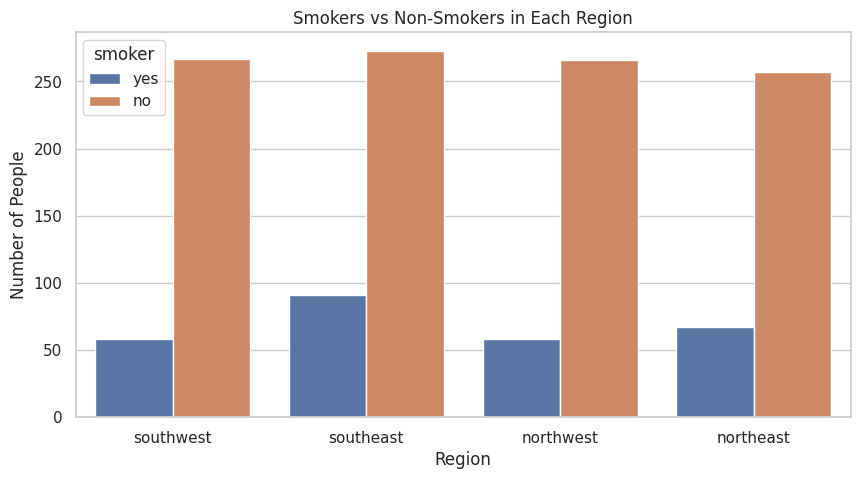

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='region', hue='smoker')
plt.title("Smokers vs Non-Smokers in Each Region")
plt.ylabel("Number of People")
plt.xlabel("Region")
plt.show()

This graph shows how many smokers and non-smokers live in each region.
In every region, non-smokers (orange bars) are are much more than common smokers.
The southeast has the highest number of smokers, compared to the other regions.

 **Line Plot: Average Charges by Age**

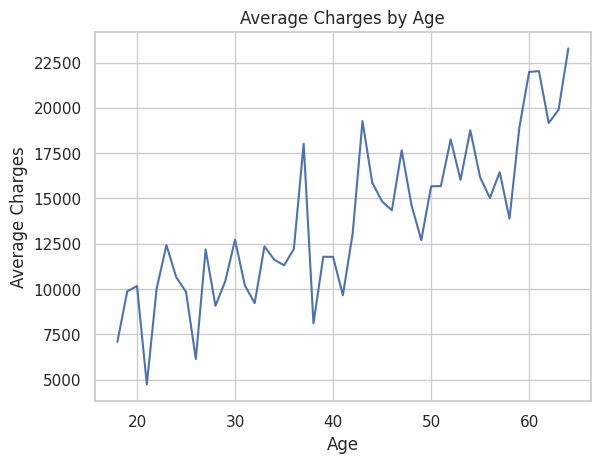

In [16]:
avg_age_charge = df.groupby('age')['charges'].mean().reset_index()
sns.lineplot(data=avg_age_charge, x='age', y='charges')
plt.title("Average Charges by Age")
plt.xlabel("Age")
plt.ylabel("Average Charges")
plt.show()

This graph shows how the insurance average cost changes with an age.
We can see that as people get older, their average charges increase ...
This means that age is a strong factor in how much people pay for insurance.

 **Correlation heatmap**

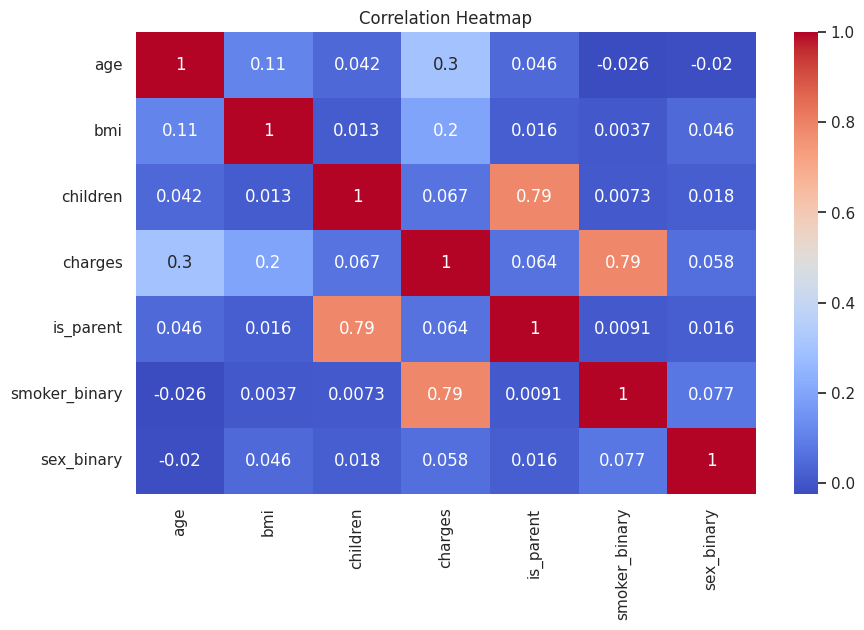

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Smokers usually have higher charges, because there's a strong link between smoking and charges.

Most other factors, like age or
sex, don't have a strong effect on charges or other values.


### 7. Export Cleaned Data for Power BI


In [18]:
df.to_csv("cleaned_medicalcostandinsurance.csv", index=False)